In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import fitz
from config import temppath, outputpath

def pdf_to_np(file_path):
    image_arrays = []
    pdf_document = fitz.open(file_path)

    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        zoom_matrix = fitz.Matrix(3.0, 3.0)
        pix = page.get_pixmap(matrix=zoom_matrix)
        channels = pix.n
        image_array = np.frombuffer(pix.samples, dtype=np.uint8).reshape((pix.height, pix.width, channels))
        image_arrays.append(image_array)

    return image_arrays

In [2]:
img1 = pdf_to_np(f"{temppath}Proportion of Top 30 Important Variables in DeepSurv.pdf")[0]
img2 = pdf_to_np(f"{temppath}Most Important Variables in DeepSurv.pdf")[0]
img3 = pdf_to_np(f"{temppath}Distribution of Partial Variable Importance in DeepSurv.pdf")[0]
img4 = pdf_to_np(f"{temppath}Heatmap of Partial Variable Importance in DeepSurv.pdf")[0]

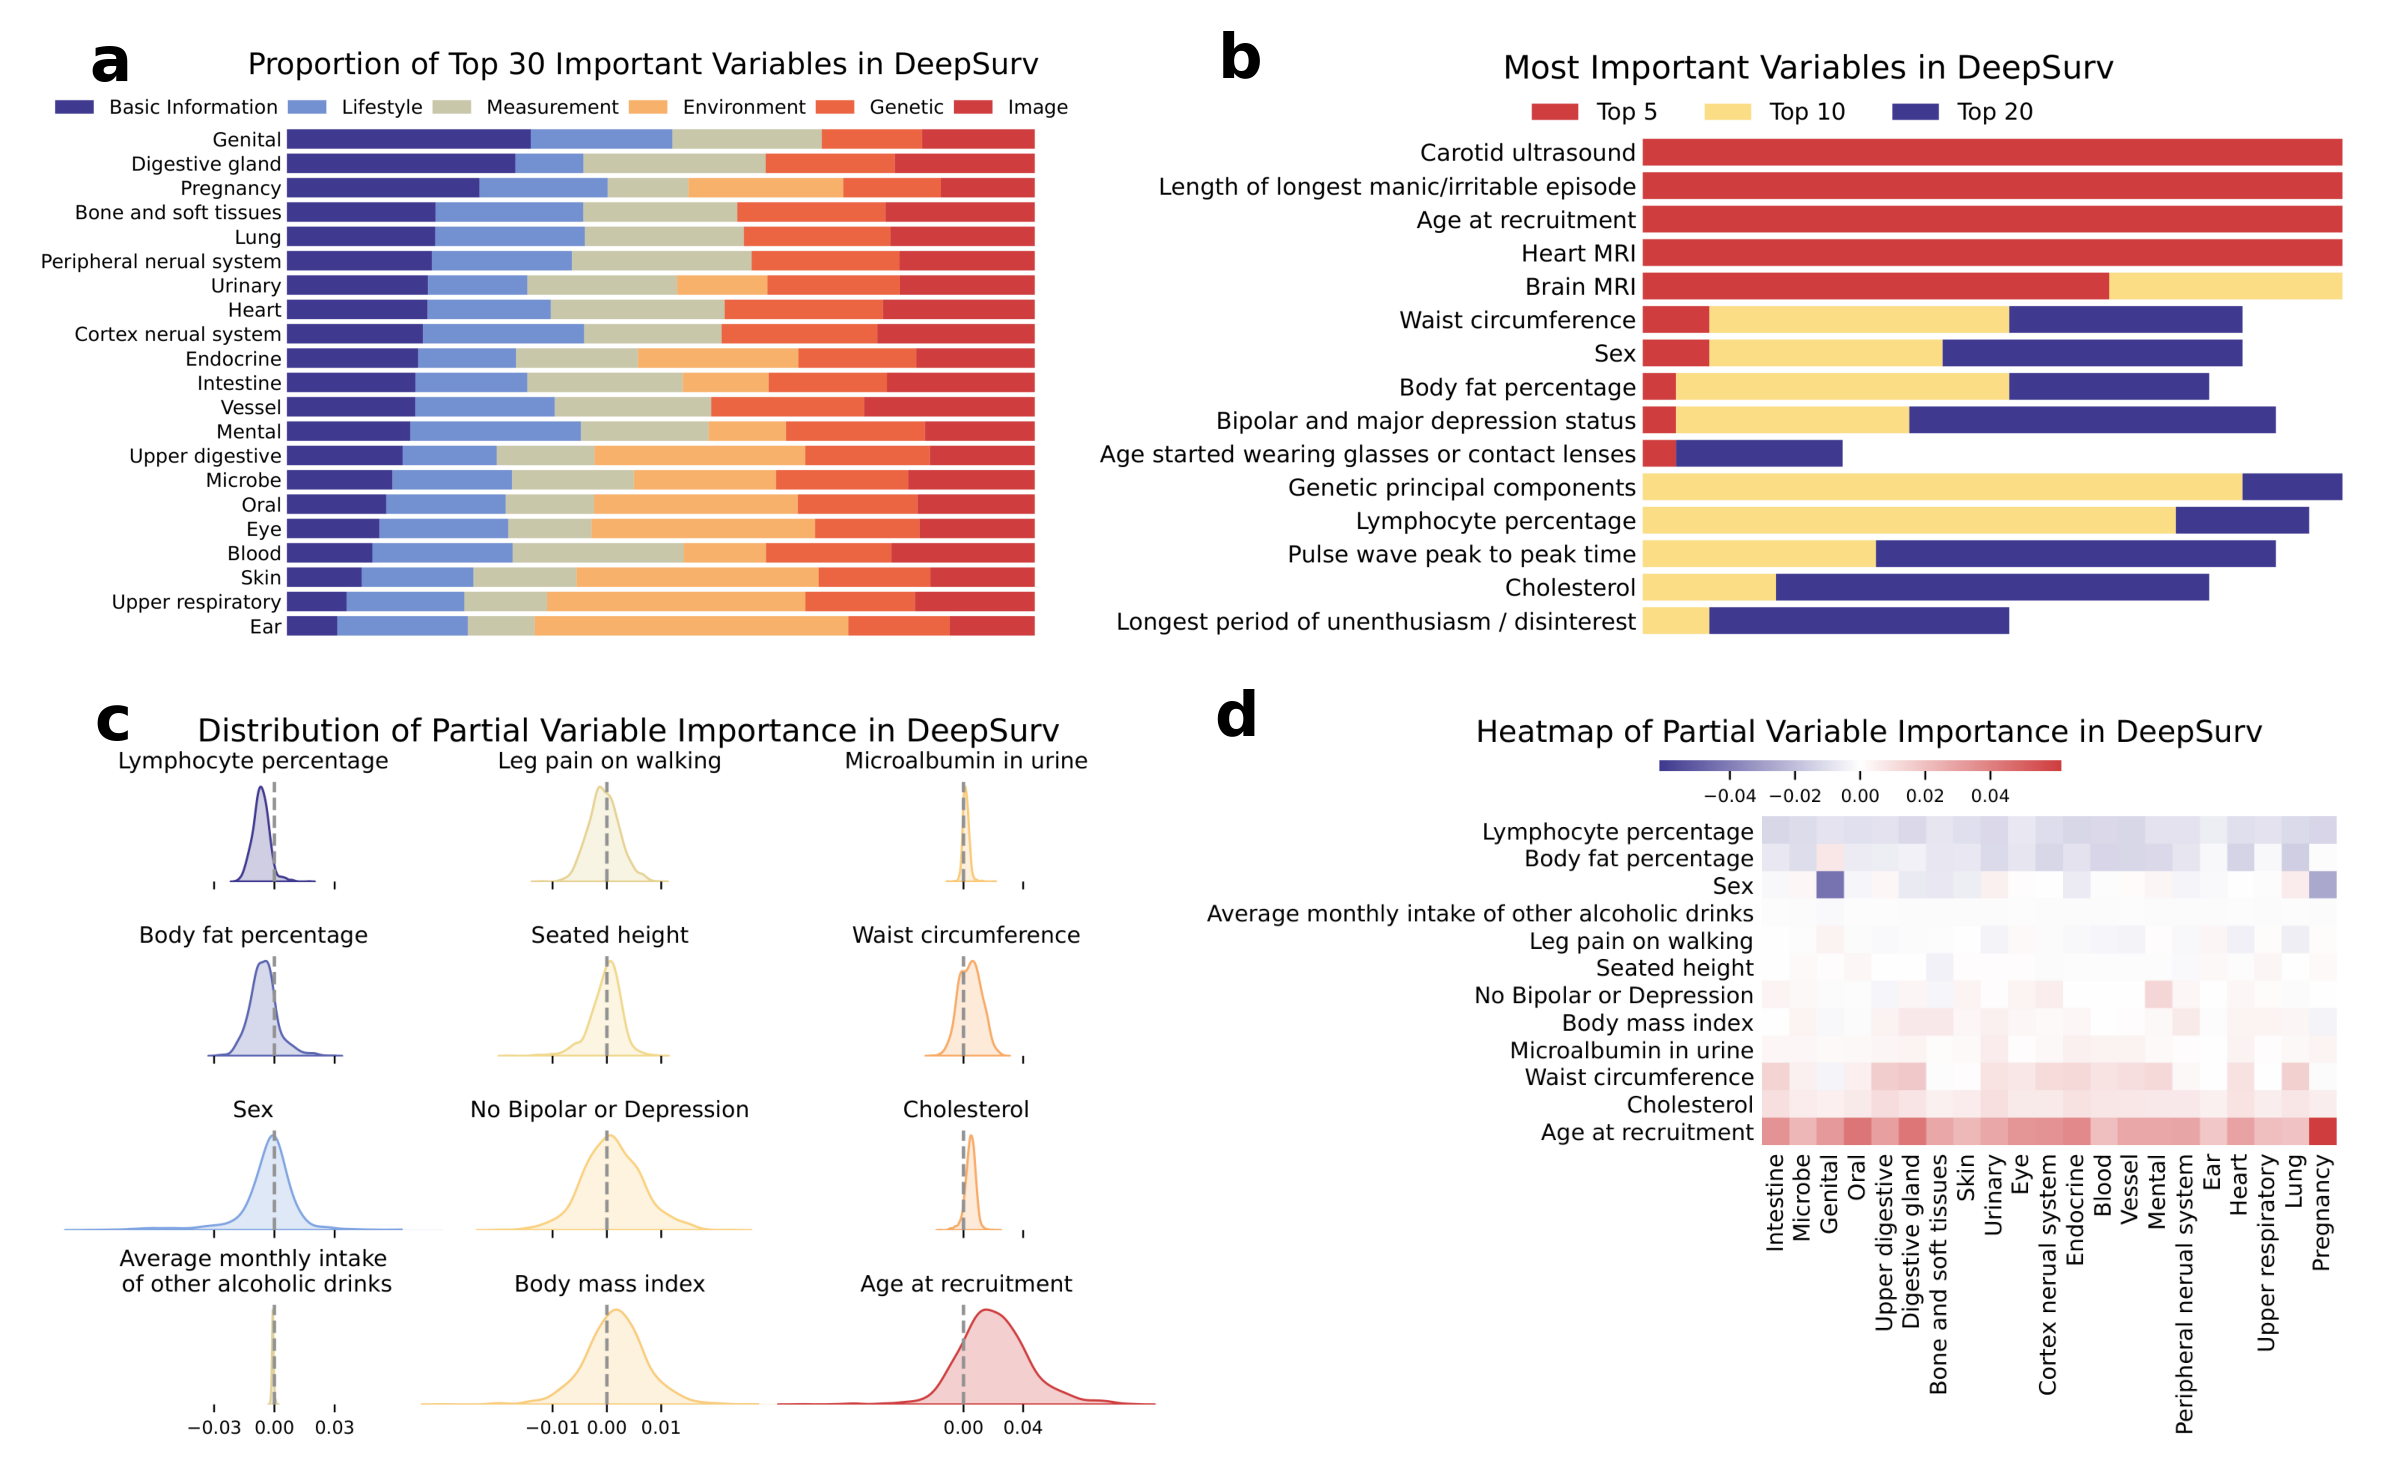

In [3]:
fig = plt.figure(figsize=(10,18),dpi=300)
gs0 = gridspec.GridSpec(2, 1, figure=fig, hspace=-0.79, height_ratios=[1.05,1.1])
gs00 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[0], width_ratios=[img1.shape[1]*img2.shape[0],img1.shape[0]*img2.shape[1]], wspace=0)
gs01 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[1],wspace=0, hspace=0, width_ratios=[img3.shape[1]*img4.shape[0],img3.shape[0]*img4.shape[1]])
ax1 = fig.add_subplot(gs00[0, 0])
ax1.imshow(img1)
ax1.text(120,80,"a",fontsize=15, fontweight=600)
ax1.axis("off")
ax2 = fig.add_subplot(gs00[0, 1])
ax2.imshow(img2)
ax2.text(220,60,"b",fontsize=15, fontweight=600)
ax2.axis("off")
ax3 = fig.add_subplot(gs01[0, 0])
ax3.imshow(img3)
ax3.text(85,50,"c",fontsize=15, fontweight=600)
ax3.axis("off")
ax4 = fig.add_subplot(gs01[0, 1])
ax4.imshow(img4)
ax4.text(30,40,"d",fontsize=15, fontweight=600)
ax4.axis("off")
plt.savefig(f"{outputpath}sup_varaible_importance_surv.pdf",format="pdf",bbox_inches="tight")
plt.show()